## 의사결정나무 : Decision Tree

#### Index
1. Decision Tree 개념
2. 엔트로피 : Entropy
3. 인포메이션 게인 : Information Gain
4. 노드를 설정하는 방법

### 1. Decision Tree 개념

- 변수들로 기준을 만들어 샘플을 분류하고 분류된 집단의 성질로 추정하는 모형
- 장점 : 해석력이 높음
- 단점 : 변동성이 높음(샘플이 조금만 추가되더라도 기준이 잘 바뀜)

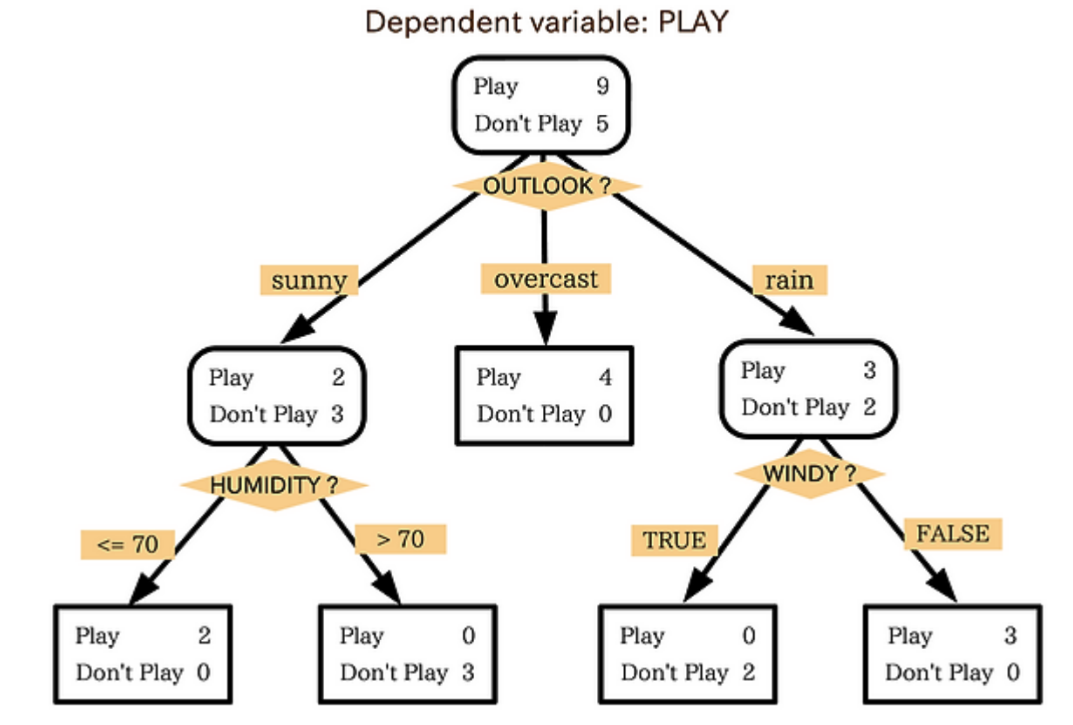

- 노드 : Node
    - Root node : 최상위노드
    - Parent node : 상대적 상위노드
    - Child node : 하위노드
    - Leaf node (Tip) : 최하위노드
    - Internal node - Leaf node가 아닌 노드(Root, Parent, Child Node)
- Edge : 샘플을 분류하는조건이 위치하는곳
- Depth : Root node에서 특정 노드까지 도달하기 위해 거쳐야하는 Edge의 수

- 반응변수(종속변수)에 따라
    - 범주형 변수 : 분류
    - 연속형 변수 : 회귀

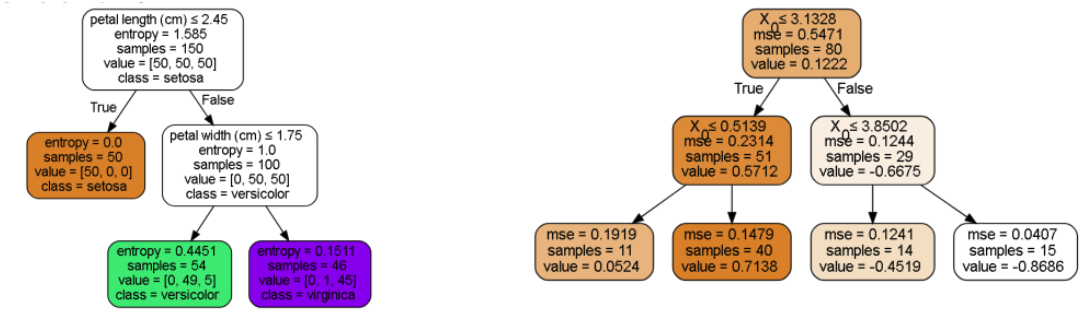

- play_tennis 샘플데이터
    - `https://www.kaggle.com/fredericobreno/play-tennis`
    - 종속변수가 범주형 -> 분류문제
    - 종속변수의 종류가 2개이므로 2 class problem 이라고 함

In [ ]:
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tennis_df = pd.read_csv("./data/play_tennis.csv")
tennis_df.tail(2)

### 2. 엔트로피 : Entropy
- Decision Tree의 수학적인 개념
- 클래스가 2개인 데이터를 하나 뽑았을때 클래스 1이 나올 확률이 0.5일때 엔트로피값은 1을 갖는 개념
- 엔트로피가 1이라는 의미는 데이터가 잘 섞여 있다는 의미
- 엔트로피 함수

$$ -plog_2p-(1-p)log_2(1-p) $$

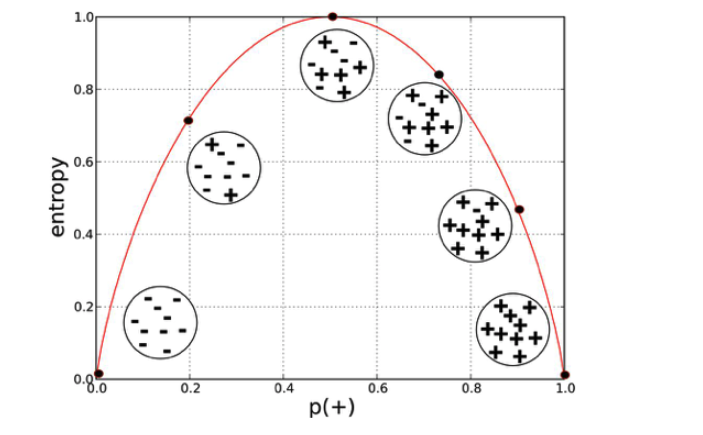

- 테니스 예제에서 엔트로피가 0, 1인 경우

In [ ]:
# 엔트로피 : 0
entropy_1 = np.sort(tennis_df["play"])[-5:]
entropy_1

In [ ]:
# 엔트로피 : 0
entropy_2 = np.sort(tennis_df["play"])[:5]
entropy_2

In [ ]:
# 엔트로피 : 1
entropy_3 = np.sort(tennis_df["play"])[:10]
np.random.shuffle(entropy_3)
entropy_3

### 3. 인포메이션 게인 : Information Gain
- 모델 이전 엔트로피 - 모델 이후 엔트로피
- $Information Gain = Entropy_{before} - Entropy_{after}$
- 원래 데이터는 섞여 있지만 디시젼트리 모델을 통과하면 엔트로피가 낮아짐(잘분류됨)

$$ -plog_2p-(1-p)log_2(1-p) $$

#### Information Gain 구하기

- $Entropy_{before}$
    - $p=\frac{9}{14}$
    - $ -plog_2p-(1-p)log_2(1-p) = -\frac{9}{14}log_{2}{\frac{9}{14}}-(1-\frac{9}{14})log_2(1-\frac{9}{14}) $
    - $entropy = 0.9402859586706311$

In [ ]:
# Yes, No의 빈도 확인
np.unique(tennis_df["play"], return_counts=True) # => 9 / 14

In [ ]:
# 수식연산
before_entropy = -(9/14) * np.log2(9/14) - (1 - (9/14)) * np.log2(1 - (9/14))
before_entropy

-  $Entropy_{after}$
    - $ -plog_2p-(1-p)log_2(1-p) $
    - 예시 1 : YES, YES, YES, YES
        - $p=\frac{4}{4}=1$
        - $ -plog_2p-(1-p)log_2(1-p) = -1log_{2}{1}-(1-1)log_2(1-1) = 0 $
        - $entropy = 0$
    - 예시 2 : NO, NO, NO, YES, YES
        - $p=\frac{2}{5}=0.4$
        - $ -plog_2p-(1-p)log_2(1-p) = -0.4log_{2}{0.4}-(1-0.4)log_2(1-0.4) = 0.9709505944546686 $
        - $entropy = 0.9709505944546686$
    - 예시 3 : NO, NO, YES, YES, YES
        - $p=\frac{3}{5}=0.6$
        - $ -plog_2p-(1-p)log_2(1-p) = -0.6log_{2}{0.6}-(1-0.6)log_2(1-0.6) = 0.9709505944546686 $
        - $entropy = 0.9709505944546686$

In [ ]:
after_entropy_1 = 0
after_entropy_2 = -0.4 * np.log2(0.4) - (1 - 0.4) * np.log2(1 - 0.4)
after_entropy_3 = -0.6 * np.log2(0.6) - (1 - 0.6) * np.log2(1 - 0.6)
after_entropy_1, after_entropy_2, after_entropy_3

- 전체 Entropy는 가중평균을 이용해서 구함
$$ Entropy_{after} = \frac{n_1*Entropy_{after1}+n_2*Entropy_{after2}+n_3*Entropy_{after3}}{n_1 + n_2 + n_3}$$

In [ ]:
after_entropy = (4 * after_entropy_1 + 5 * after_entropy_2 + 5 * after_entropy_3) / (4 + 5 + 5)
after_entropy

In [ ]:
information_gain = before_entropy - after_entropy
information_gain

### 4. 노드를 설정하는 방법
- information gain이 가장 높은 변수를 root 변수로 설정
- 나머지 변수들을 information gain을 구하고 information gain이 가장 높은 변수를 다음 노드로 설정

### 5. Decision Tree 예시

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.keys(), iris.feature_names, iris.target_names

In [ ]:
datas = np.c_[iris.data, iris.target]
datas.shape

In [ ]:
columns = iris.feature_names + ["label"]
columns

In [ ]:
df = pd.DataFrame(datas, columns=columns)
df.tail()

In [ ]:
model = DecisionTreeClassifier(max_depth=2, random_state=1).fit(iris.data, iris.target)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(iris.target, model.predict(iris.data))

In [ ]:
model.score(iris.data, iris.target)